## Proyecto 1 - Parte 2

### 1. Analisis Descriptivos
---

#### 1.1 Resumen Dataset
- Tenemos 12 columnas y 8523 filas.
- Tenemos valores nulos en la columna 'Item_Weight'. Espramos reemplazarlos con el promedio de 'Item_Weight' por 'item_fat_content' y 'item_type'.
- Tenemos valores nulos en la columna 'Outlet_Size'. Al ser una columna categorica, veremos que otras variables podemos usar.
- Solo tenemos 3 tiendas sin 'Outlet_Size', pero son mas filas porque se repite por su cantidad de productos.
- Tenemos Item_Fat_Content con labels repetidos y erroneos que hay que aunar. Deajaremos solo dos valores en esta columna, 'Regular' y 'Low Fat'.
- Tenemos atributos de productos y locales en el dataset, ademas de la venta final por producto y local (Item_Outlet_Sales).

In [625]:
# Importamo librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
import math

#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

# Linear Regression
from sklearn.linear_model import LinearRegression

In [626]:
# Leemos el archivo CSV que contiene la data:
file = r'C:/Users/Juan.Paredes/Unilever/Data & Analytics CL DEV - General/Nacho/1. Visual Studio Scripts/CURSO DOJO/6. Ejercicio Prediccion Ventas (Parte 2)/sales_predictions (1).csv'
df = pd.read_csv(file)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### 1.2 Analisis Estadistico Descriptivo
---
- Tenemos records con Item_Visibility en 0, esto diria que no tienen visibilidad en la tienda, debemos revisar si es un error que debemos arreglar.
- La base contiene 1559 productos diferentes en su catalogo que son vendidos en 10 tiendas/outlers.
- El peso promedio de los productos es de 12.8 KG.
- El precio promedio de los productos es de $ 140.99.
- La venta promedio por sala/producto es de $ 2181.28.
- Vemos que la variable que tiene mayor correlacion con la venta es Item_MRP que es el precio del producto.
- La tienda con mayor venta es la **OUT027**.

In [628]:
print('La base sales tiene ' + str(df['Item_Identifier'].nunique()) + ' productos en su catalogo, atendiendo en '+ str(df['Outlet_Identifier'].nunique()) +' tiendas/outlers.')
df.describe()

La base sales tiene 1559 productos en su catalogo, atendiendo en 10 tiendas/outlers.


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


[Text(0, 0, '5089'),
 Text(0, 0, '2889'),
 Text(0, 0, '112'),
 Text(0, 0, '316'),
 Text(0, 0, '117')]

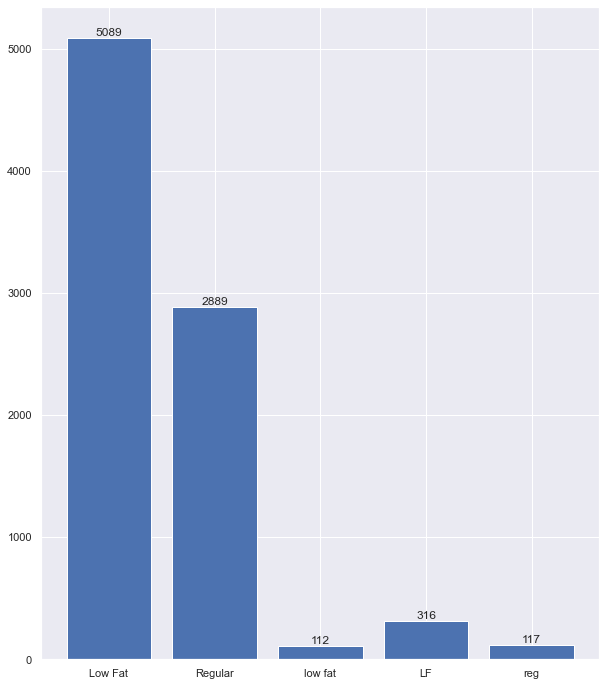

In [629]:
# Revisamos la columna Item_Fat_Content
item = df['Item_Fat_Content'].unique()
lista = []

for i in item:
    x = (df['Item_Identifier'].loc[df['Item_Fat_Content'] == i]).count()
    lista.append(x)

x = item
y = lista

fig, ax = plt.subplots()
bars = ax.bar(x, y)
ax.bar_label(bars)

[Text(0, 0, '1'), Text(0, 0, '3'), Text(0, 0, '3'), Text(0, 0, '3')]

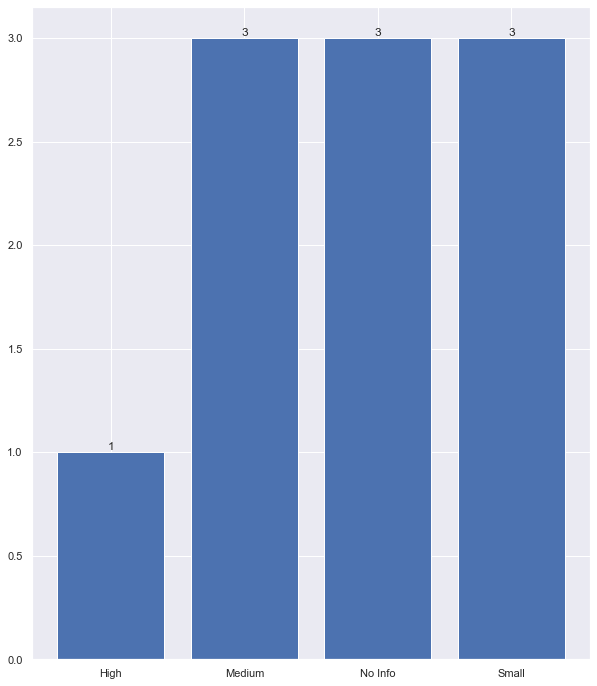

In [630]:
# Revisamos Outlet Type
df_size = df
df_size['Outlet_Size'].fillna('No Info',inplace=True)
df_size = df.groupby('Outlet_Size')['Outlet_Identifier'].nunique().reset_index()

x = df_size['Outlet_Size']
y = df_size['Outlet_Identifier']

fig, ax = plt.subplots()
bars = ax.bar(x, y)
ax.bar_label(bars)

[Text(0, 0, '3'), Text(0, 0, '3'), Text(0, 0, '4')]

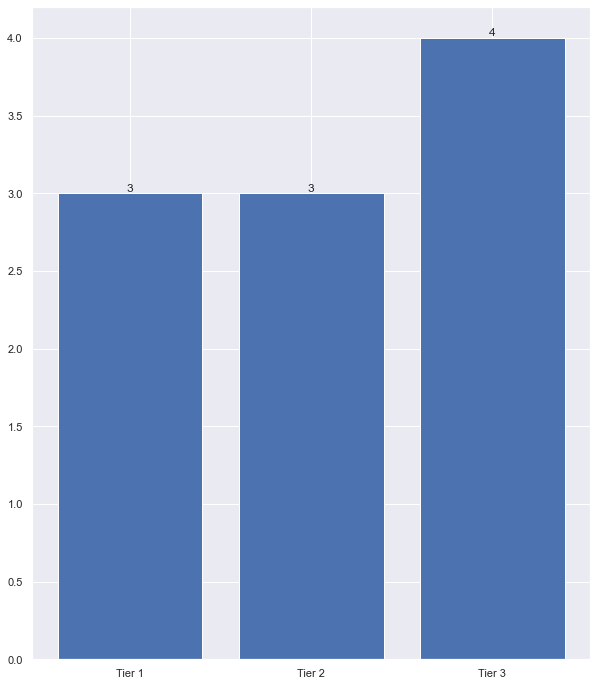

In [631]:
# Revisamos Outlet Type
df_size = df
df_size['Outlet_Location_Type'].fillna('No Info',inplace=True)
df_size = df.groupby('Outlet_Location_Type')['Outlet_Identifier'].nunique().reset_index()

x = df_size['Outlet_Location_Type']
y = df_size['Outlet_Identifier']

fig, ax = plt.subplots()
bars = ax.bar(x, y)
ax.bar_label(bars)

[Text(0, 0, '2'), Text(0, 0, '6'), Text(0, 0, '1'), Text(0, 0, '1')]

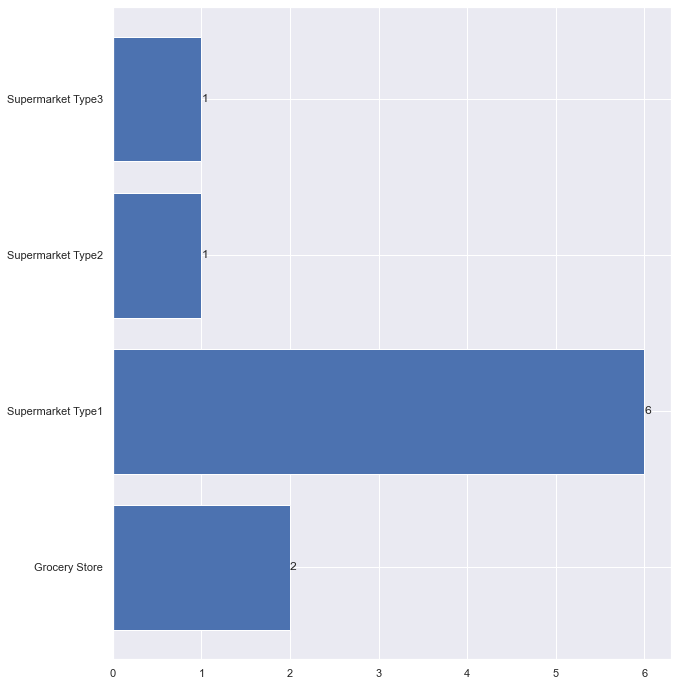

In [632]:
# Revisamos Outlet Type
df_size = df
df_size['Outlet_Type'].fillna('No Info',inplace=True)
df_size = df.groupby('Outlet_Type')['Outlet_Identifier'].nunique().reset_index()

x = df_size['Outlet_Type']
y = df_size['Outlet_Identifier']

fig, ax = plt.subplots()
bars = ax.barh(x, y)
ax.bar_label(bars)

### 2. Transformaciones y Tratamiento de Nulos
---

#### 2.0 Correccion Datos Erroneos **(Item_Fat_Content)**

In [633]:
# Creamos un diccionario para remapear los nombres mal escritos de Fat Content para poder hacer un dataframe.
dic = {'LF': 'Low Fat','low fat':'Low Fat' , 'reg':'Regular'}

# Hacmeos el reemplazo:
df.replace({"Item_Fat_Content": dic},inplace=True)

#Revisamos la columna:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

#### 2.1 Nulos **(Item_Weight)**

In [634]:
# Creamos una maestra con Item_Identifier y Item_Weight
item_weight = df[['Item_Identifier','Item_Weight']][df['Item_Weight'].isnull() == False]
item_weight.drop_duplicates(inplace=True)
item_weight

,Item_Identifier,Item_Weight
0,FDA15,9.300
1,DRC01,5.920
2,FDN15,17.500
3,FDX07,19.200
4,NCD19,8.930
...,...,...
7298,NCW05,20.250
7373,FDS09,8.895
7421,FDU43,19.350
7944,FDO49,10.600


In [635]:
# Reemplazamos los nulos de Item_Weight con la maestra creada arriba y solucionamos la mayoria de los nulos
df = df.merge(item_weight, how = 'left', on = 'Item_Identifier')
df.drop(columns='Item_Weight_x',inplace=True)
df.rename(columns={'Item_Weight_y':'Item_Weight'},inplace=True)
df.dropna(axis=0,subset=['Item_Weight'],inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Fat_Content           8519 non-null   object 
 2   Item_Visibility            8519 non-null   float64
 3   Item_Type                  8519 non-null   object 
 4   Item_MRP                   8519 non-null   float64
 5   Outlet_Identifier          8519 non-null   object 
 6   Outlet_Establishment_Year  8519 non-null   int64  
 7   Outlet_Size                8519 non-null   object 
 8   Outlet_Location_Type       8519 non-null   object 
 9   Outlet_Type                8519 non-null   object 
 10  Item_Outlet_Sales          8519 non-null   float64
 11  Item_Weight                8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


#### 2.2 Nulos **(Outlet_Size)**

In [636]:
df_stores = df.groupby(['Outlet_Location_Type','Outlet_Identifier','Outlet_Size']).agg(
    total_items = pd.NamedAgg(column="Item_Identifier", aggfunc="count"),
    total_item_types = pd.NamedAgg(column="Item_Type", aggfunc="nunique"),
    total_visibility = pd.NamedAgg(column="Item_Visibility", aggfunc="sum"),
    total_sales = pd.NamedAgg(column="Item_Outlet_Sales", aggfunc="sum"),
    total_wight = pd.NamedAgg(column="Item_Weight", aggfunc="sum")
    ).reset_index()

df_stores

,Outlet_Location_Type,Outlet_Identifier,Outlet_Size,total_items,total_item_types,total_visibility,total_sales,total_wight
0,Tier 1,OUT019,Small,527,16,57.065541,1.795736e+05,6855.745
1,Tier 1,OUT046,Small,930,16,56.231875,2.118395e+06,11966.125
2,Tier 1,OUT049,Medium,930,16,56.549156,2.183970e+06,12013.225
3,Tier 2,OUT017,No Info,926,16,56.834646,2.167465e+06,11877.495
4,Tier 2,OUT035,Small,930,16,56.974873,2.268123e+06,11931.295
5,Tier 2,OUT045,No Info,929,16,56.180780,2.036725e+06,11751.840
6,Tier 3,OUT010,No Info,555,16,56.308832,1.883402e+05,7166.800
7,Tier 3,OUT013,High,932,16,55.879859,2.142664e+06,12121.730
8,Tier 3,OUT018,Medium,928,16,56.621454,1.851823e+06,11946.465
9,Tier 3,OUT027,Medium,932,16,54.564185,3.444468e+06,12054.985


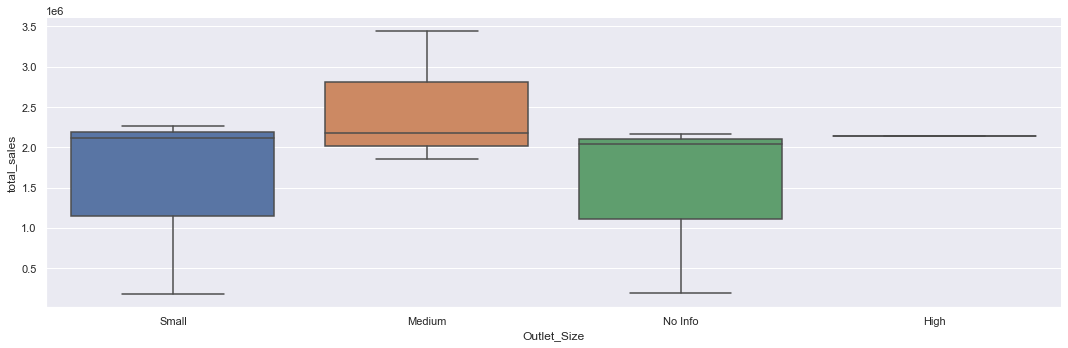

In [637]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(x="Outlet_Size", y="total_sales", kind="box", data=df_stores ,aspect= 3 )

##### Reemplazo Outlet_Size
- Las 3 tiendas que no tienen informacion de outlet_size, solo una de ellas podriamos decir que es "Small", dada su baja venta y numero de productos catalogados.
- Para las otras dos tiendas, no tenemos como diferenciar si son "Medium" o "High", dado esto las dejaremos como "Medium" ya que es la moda.

In [638]:
# Creaoms un datframe solo con los outlet sin informacion de size:
df_stores = df_stores[df_stores['Outlet_Size'] == 'No Info']

# En este datframe creamos una nueva columna con la regla de negocios:
df_stores['new_size'] = np.where(df_stores['total_items']  < 900 , 'Small', 'Medium')

#Revisamos
df_stores

C:\Users\Juan.Paredes\AppData\Local\Temp\ipykernel_20840\23313130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stores['new_size'] = np.where(df_stores['total_items']  < 900 , 'Small', 'Medium')


,Outlet_Location_Type,Outlet_Identifier,Outlet_Size,total_items,total_item_types,total_visibility,total_sales,total_wight,new_size
3,Tier 2,OUT017,No Info,926,16,56.834646,2.167465e+06,11877.495,Medium
5,Tier 2,OUT045,No Info,929,16,56.180780,2.036725e+06,11751.840,Medium
6,Tier 3,OUT010,No Info,555,16,56.308832,1.883402e+05,7166.800,Small


In [639]:
# Traemos los nuevos Outlet_Sizes al datframe original con merge:
df = df.merge(df_stores[['Outlet_Identifier','new_size']], how = 'left' , on = 'Outlet_Identifier')

#Realizamos el reemplazo donde los outlet_size son "No Info":
df['Outlet_Size'] = np.where(df['Outlet_Size']  == 'No Info' , df['new_size'], df['Outlet_Size'])

# Borramos columna auxiliar
df.drop(columns='new_size',inplace=True)

#Revisamos
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


[Text(0, 0, '1'), Text(0, 0, '5'), Text(0, 0, '4')]

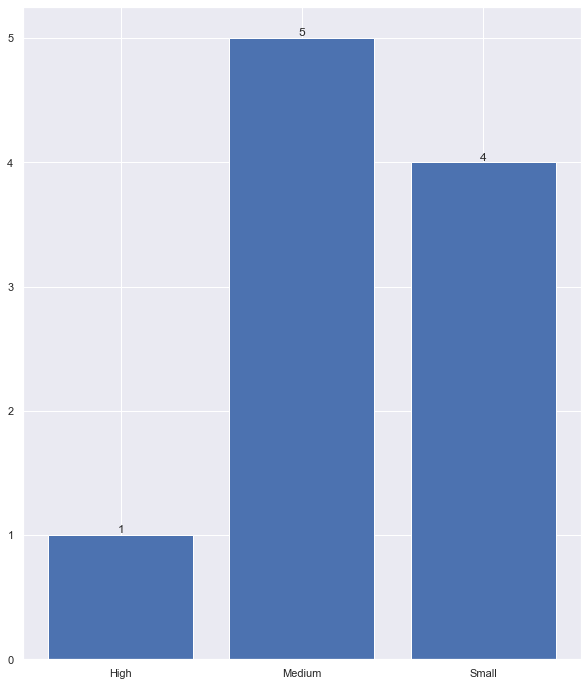

In [640]:
# Revisamos Outlet_Size final, una vez corregido
df_size = df
df_size['Outlet_Size'].fillna('No Info',inplace=True)
df_size = df.groupby('Outlet_Size')['Outlet_Identifier'].nunique().reset_index()
df_size


x = df_size['Outlet_Size']
y = df_size['Outlet_Identifier']

fig, ax = plt.subplots()
bars = ax.bar(x, y)

ax.bar_label(bars)

#### 2.3 Nulos **Item_Visibility**

In [641]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [642]:
print(len(df))

8519


In [643]:
print(len(df[df['Item_Visibility'] > 0]))
print(len(df[df['Item_Visibility'] == 0]))

7993
526


In [644]:
# Creamos maestra de promedio de Item_Visibility
df_visibility = df.groupby(['Item_Identifier','Outlet_Identifier','Item_Visibility'])['Item_Outlet_Sales'].sum().reset_index()
df_visibility = df_visibility[df_visibility['Item_Visibility'] > 0]
df_visibility = df_visibility.groupby(['Item_Identifier'])['Item_Visibility'].mean().reset_index()

# Agrefamos al df original

df = df.merge(df_visibility, how = 'left', on = ['Item_Identifier'])

df['Item_Visibility'] = np.where(df['Item_Visibility_x'] == 0, df['Item_Visibility_y'], df['Item_Visibility_x'])

df.drop(columns=['Item_Visibility_x','Item_Visibility_y'],inplace=True)

df


,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight,Item_Visibility
0,FDA15,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920,0.019278
2,FDN15,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,0.016760
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.200,0.022911
4,NCD19,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930,0.016164
...,...,...,...,...,...,...,...,...,...,...,...,...
8514,FDF22,Low Fat,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865,0.056783
8515,FDS36,Regular,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,8.380,0.046982
8516,NCJ29,Low Fat,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600,0.035186
8517,FDN46,Regular,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,0.145221


## Proyecto 1 - Parte 3
---
- Crea varias visualizaciones de datos que te ayuden a entender mejor los datos con los que estás trabajando (análisis exploratorio de datos) y que ayude a otras personas entender las tendencias en los datos (análisis explicativo de datos).

In [645]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight,Item_Visibility
0,FDA15,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.022911
4,NCD19,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.016164


#### 3.1 Visualizaciones

[Text(0, 0, '1.2654e+06'),
 Text(0, 0, '553237'),
 Text(0, 0, '232299'),
 Text(0, 0, '1.44415e+06'),
 Text(0, 0, '1.51914e+06'),
 Text(0, 0, '1.82416e+06'),
 Text(0, 0, '2.82006e+06'),
 Text(0, 0, '457793'),
 Text(0, 0, '1.0452e+06'),
 Text(0, 0, '2.05549e+06'),
 Text(0, 0, '917566'),
 Text(0, 0, '325518'),
 Text(0, 0, '148868'),
 Text(0, 0, '2.72835e+06'),
 Text(0, 0, '892898'),
 Text(0, 0, '351401')]

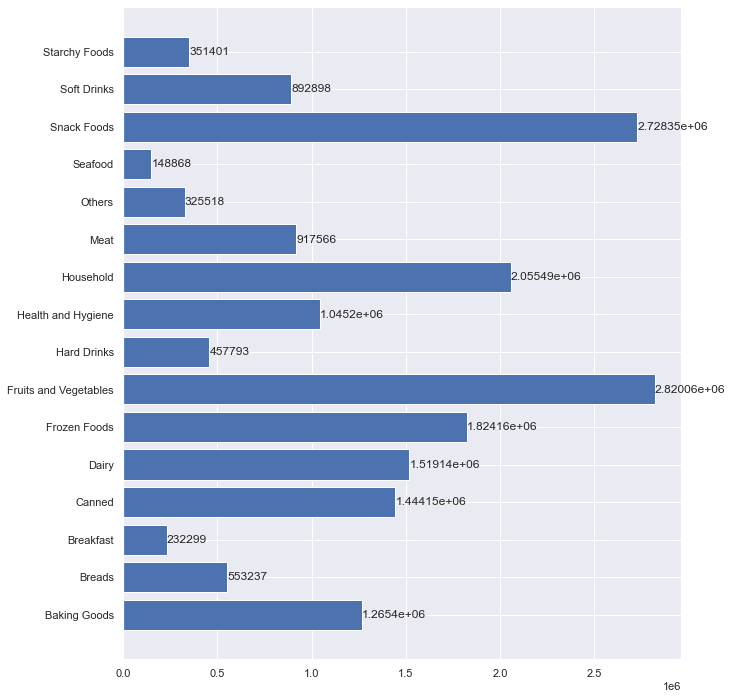

In [646]:
# Revisamos cuales son los Item_Type con mayor venta
df_Item_Type = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index()

fig, ax = plt.subplots()
bars = ax.barh(df_Item_Type['Item_Type'], df_Item_Type['Item_Outlet_Sales'])
ax.bar_label(bars)

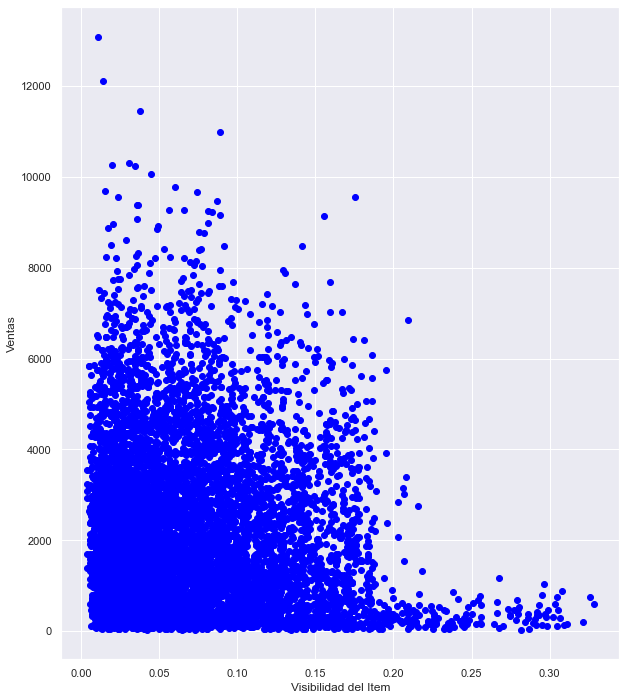

In [647]:
# Veremos la correlacion entre la variable de visbilidad del pructo y sus ventas
x = df['Item_Visibility']
y = df['Item_Outlet_Sales']
 
plt.scatter(x, y, c ="blue")

plt.xlabel("Visibilidad del Item")
plt.ylabel("Ventas")
# To show the plot
plt.show()

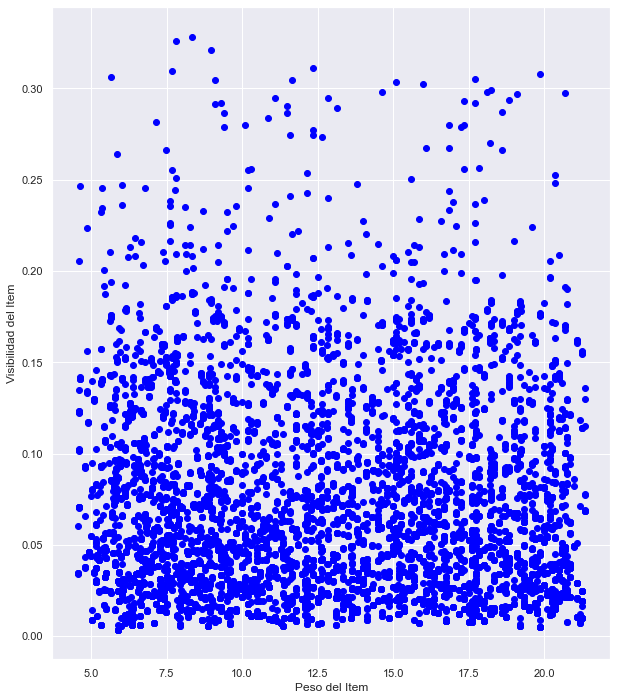

In [648]:
# Veremos la correlacion entre la variable de visbilidad del pructo y sus ventas
x = df['Item_Weight']
y = df['Item_Visibility']
 
plt.scatter(x, y, c ="blue")

plt.xlabel("Peso del Item")
plt.ylabel("Visibilidad del Item")

# To show the plot
plt.show()

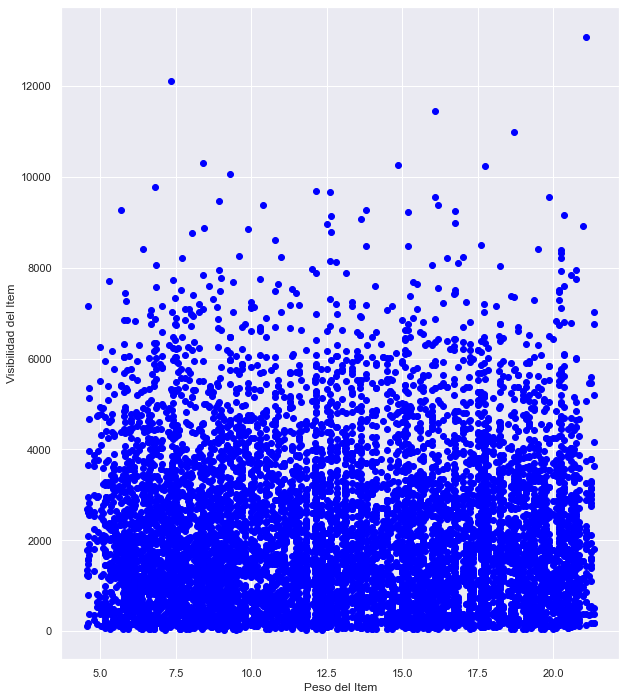

In [649]:
# Veremos la correlacion entre la variable de visbilidad del pructo y sus ventas
x = df['Item_Weight']
y = df['Item_Outlet_Sales']
 
plt.scatter(x, y, c ="blue")

plt.xlabel("Peso del Item")
plt.ylabel("Visibilidad del Item")

# To show the plot
plt.show()

## Proyecto 1 - Parte 4

### Análisis Estadístico
---
- Histogramas para ver la distribución de varias características en tu conjunto de datos
- Diagramas de caja para ver los resúmenes estadísticos de varias características en tu conjunto de datos.
- Bonus: mapas de calor de las correlaciones entre características
- Cualquier cosa que quieras continuar refinando para el proyecto (siéntete libre de continuar con los trabajos de las semanas anteriores que no tuviste tiempo para completar).

### 4.1 Histogramas

Text(0.5, 1.0, 'A Histogram of Item_Outlet_Sales')

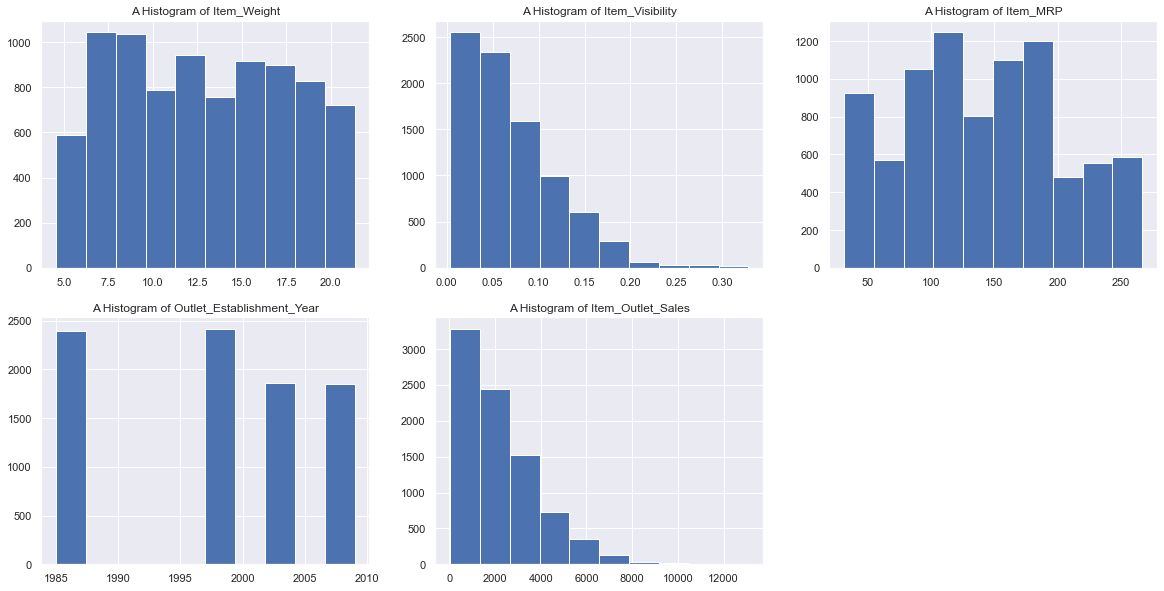

In [650]:
# Revisamos Histogramas de las variables
plt.subplots(figsize=(20, 10))

### Primer Histograma
plt.subplot(2,3,1)
plt.hist(df['Item_Weight'])
plt.title('A Histogram of Item_Weight')

### Segundo Histograma
plt.subplot(2,3,2)
plt.hist(df['Item_Visibility'])
plt.title('A Histogram of Item_Visibility')

### Tercer Histograma
plt.subplot(2,3,3)
plt.hist(df['Item_MRP'])
plt.title('A Histogram of Item_MRP')

### Cuarto Histograma
plt.subplot(2,3,4)
plt.hist(df['Outlet_Establishment_Year'])
plt.title('A Histogram of Outlet_Establishment_Year')

### Quinto Histograma
plt.subplot(2,3,5)
plt.hist(df['Item_Outlet_Sales'])
plt.title('A Histogram of Item_Outlet_Sales')

- Vemos como Item_Weight tiene una distribucion normal.
- Item_Visibility vemos que tiene una distribucion asietrica positiva.
- Item_MRP nos muestra que los valores de los precios estan bien distribuidos, sin concentrarce en algun extremo.
- Item_Outlet_Sales tambien muestra una distribucion asimetrica positiva con algunos outliers.
- Outlet_Establishment_Year muestra que hay mas salas abiertas en dos años en particular.

### 4.2 Diagramas de Caja

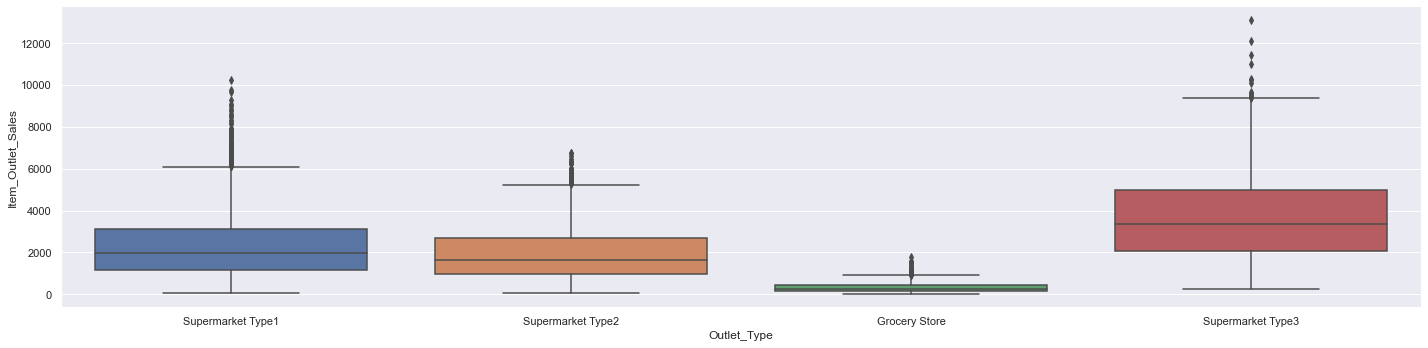

In [651]:
# Primer Grafico: Revisamos el contenido de grasa Low Fat / Regular para cada tipo de categoria de alimento.
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(x="Outlet_Type", y="Item_Outlet_Sales", kind="box", data=df ,aspect= 4 )

- Al analizar el boxplot anterior, vemos que el **Outlet_Type** que tiene mayores ventas es **Supermarket Type3** seguido de **Supermarket Type1**.
- El formato Grocery Store tiene ventas muy bajas comparadadas con los tipos supermarkets.

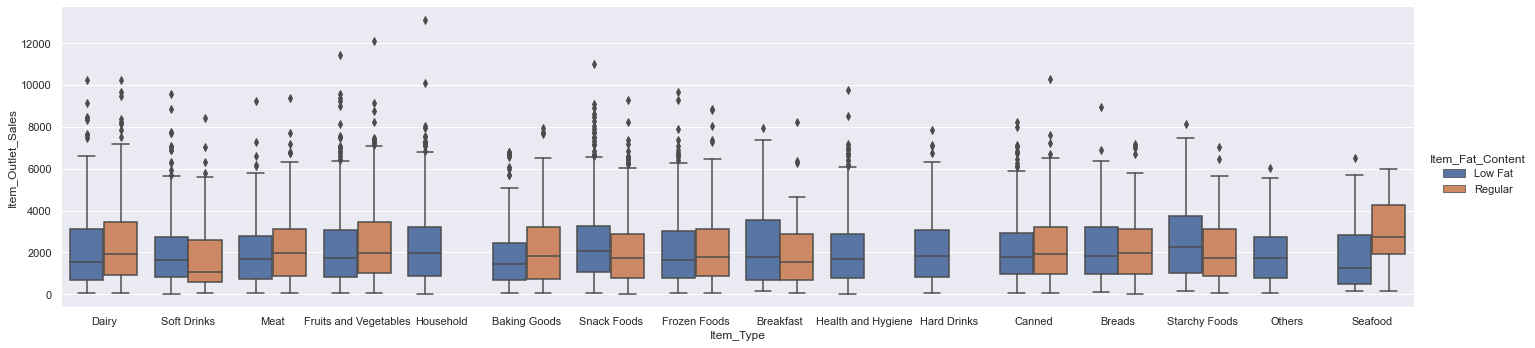

In [652]:
# Revisamos la diferencia en ventas por tienda y tipo de fat content

sns.set(rc={'figure.figsize':(10,12)})
sns.catplot(x="Item_Type", y="Item_Outlet_Sales", hue="Item_Fat_Content", kind="box", data=df ,aspect= 4 )

Revisando las ventas por Item_Type y Item_Fat_Content, vemos que para la mayoria de item_type la categoria "Regular" tiene ventas superiores a las de Low Fat, a excepcion de "Soft Drinks", "Snack Foods", "Breakfast" y "Starchy Foods".

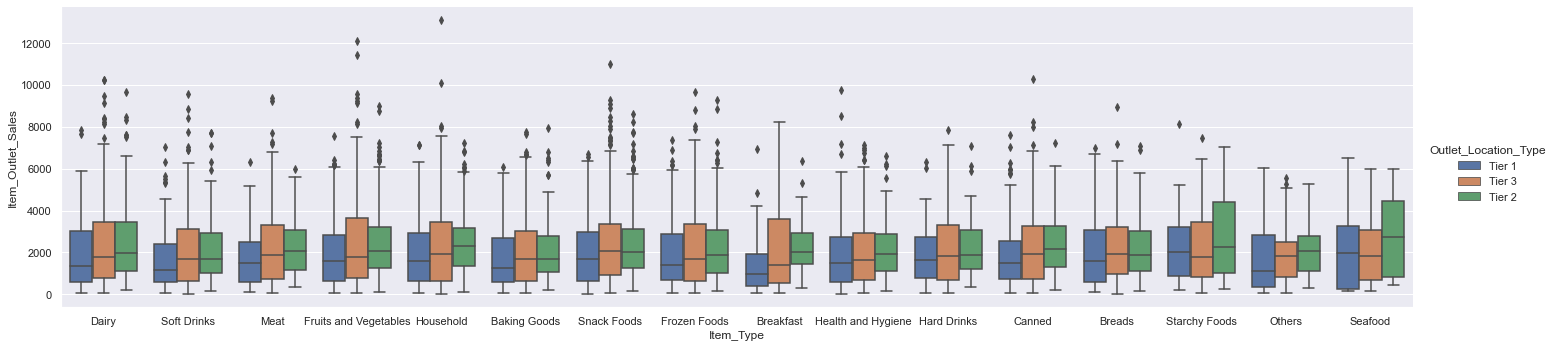

In [653]:
# Primer Grafico: Revisamos el contenido de grasa Low Fat / Regular para cada tipo de categoria de alimento.
sns.set(rc={'figure.figsize':(10,12)})
sns.catplot(x="Item_Type", y="Item_Outlet_Sales", hue="Outlet_Location_Type", kind="box", data=df ,aspect= 4 )

Vemos que consistentemente a lo largo de todos los **Item_Type**, el **Outlet_Location_Type** del Tier 2, tiene mayores ventas que el Tier 1 o Tier 3. 

### 4.3 Mapa Correlacion

In [654]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2).highlight_null(null_color='#f1f1f1')

C:\Users\Juan.Paredes\AppData\Local\Temp\ipykernel_20840\2362800189.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2).highlight_null(null_color='#f1f1f1')


,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight,Item_Visibility
Item_MRP,1.00,0.00,0.57,0.03,-0.01
Outlet_Establishment_Year,0.00,1.00,-0.05,-0.01,-0.07
Item_Outlet_Sales,0.57,-0.05,1.00,0.01,-0.13
Item_Weight,0.03,-0.01,0.01,1.00,-0.02
Item_Visibility,-0.01,-0.07,-0.13,-0.02,1.00


- Revisando que variables impactan **Item_Outlet_Sales**, vemos que Item_MRP es que la que tiene una correlacion positiva y sigfinicativa, el resto de las variables no muestran una correlacion significativa.

## Proyecto 1 - Parte 5

### Base Final

In [655]:
df2 = df.copy()
df2.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight,Item_Visibility
0,FDA15,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.022911
4,NCD19,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.016164


#### Logaritmo

<AxesSubplot:>

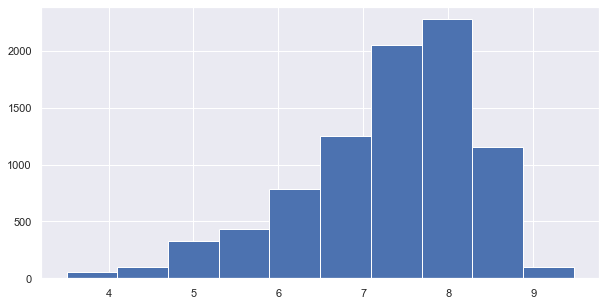

In [656]:
df2['Item_Outlet_Sales'] = np.log(df2['Item_Outlet_Sales'])
df2['Item_Outlet_Sales'].hist(figsize=(10, 5))

<AxesSubplot:>

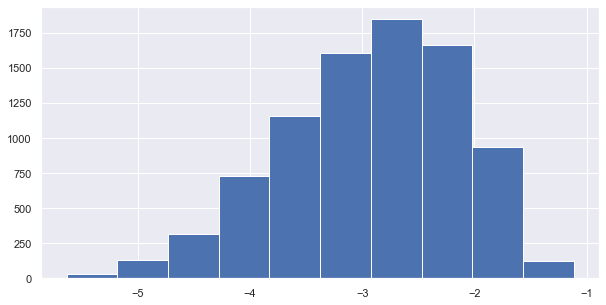

In [657]:
df2['Item_Visibility'] = np.log(df2['Item_Visibility'])
df2['Item_Visibility'].hist(figsize=(10, 5))

In [658]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2).highlight_null(null_color='#f1f1f1')

C:\Users\Juan.Paredes\AppData\Local\Temp\ipykernel_20840\2362800189.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2).highlight_null(null_color='#f1f1f1')


,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight,Item_Visibility
Item_MRP,1.00,0.00,0.57,0.03,-0.01
Outlet_Establishment_Year,0.00,1.00,-0.05,-0.01,-0.07
Item_Outlet_Sales,0.57,-0.05,1.00,0.01,-0.13
Item_Weight,0.03,-0.01,0.01,1.00,-0.02
Item_Visibility,-0.01,-0.07,-0.13,-0.02,1.00


#### One Hot Econding

In [659]:
# Get one hot encoding of columns Item_Type
one_hot = pd.get_dummies(df2['Item_Type'])

# Drop column Item_Type as it is now encoded
df2 = df2.drop('Item_Type',axis = 1)

# Join the encoded df2
df2 = df2.join(one_hot)

# Eliminamos Ultima Columna para evitar colinearidad
# df2 = df2.iloc[:, :-1]

df2.head()

,Item_Identifier,Item_Fat_Content,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,FDA15,Low Fat,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225540,9.30,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,Regular,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.094524,5.92,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,Low Fat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648392,17.50,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,Regular,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.596300,19.20,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,Low Fat,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.902446,8.93,...,0,0,0,1,0,0,0,0,0,0


In [660]:
# Get one hot encoding of columns Outlet_Location_Type
one_hot = pd.get_dummies(df2['Outlet_Location_Type'])

# Drop column Outlet_Location_Type as it is now encoded
df2 = df2.drop('Outlet_Location_Type',axis = 1)

# Join the encoded df2
df2 = df2.join(one_hot)

# Eliminamos Ultima Columna para evitar colinearidad
# df2 = df2.iloc[:, :-1]

df2.head()

,Item_Identifier,Item_Fat_Content,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales,Item_Weight,Item_Visibility,...,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Tier 1,Tier 2,Tier 3
0,FDA15,Low Fat,249.8092,OUT049,1999,Medium,Supermarket Type1,8.225540,9.30,-4.132215,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,Regular,48.2692,OUT018,2009,Medium,Supermarket Type2,6.094524,5.92,-3.948780,...,0,0,0,0,0,1,0,0,0,1
2,FDN15,Low Fat,141.6180,OUT049,1999,Medium,Supermarket Type1,7.648392,17.50,-4.088756,...,0,1,0,0,0,0,0,1,0,0
3,FDX07,Regular,182.0950,OUT010,1998,Small,Grocery Store,6.596300,19.20,-3.776160,...,0,0,0,0,0,0,0,0,0,1
4,NCD19,Low Fat,53.8614,OUT013,1987,High,Supermarket Type1,6.902446,8.93,-4.124950,...,1,0,0,0,0,0,0,0,0,1


In [661]:
# Get one hot encoding of columns Outlet_Type
one_hot = pd.get_dummies(df2['Outlet_Type'])

# Drop column Outlet_Type as it is now encoded
df2 = df2.drop('Outlet_Type',axis = 1)

# Join the encoded df2
df2 = df2.join(one_hot)

# Eliminamos Ultima Columna para evitar colinearidad
# df2 = df2.iloc[:, :-1]

df2.head()

,Item_Identifier,Item_Fat_Content,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Weight,Item_Visibility,Baking Goods,...,Snack Foods,Soft Drinks,Starchy Foods,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,Low Fat,249.8092,OUT049,1999,Medium,8.225540,9.30,-4.132215,0,...,0,0,0,1,0,0,0,1,0,0
1,DRC01,Regular,48.2692,OUT018,2009,Medium,6.094524,5.92,-3.948780,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,Low Fat,141.6180,OUT049,1999,Medium,7.648392,17.50,-4.088756,0,...,0,0,0,1,0,0,0,1,0,0
3,FDX07,Regular,182.0950,OUT010,1998,Small,6.596300,19.20,-3.776160,0,...,0,0,0,0,0,1,1,0,0,0
4,NCD19,Low Fat,53.8614,OUT013,1987,High,6.902446,8.93,-4.124950,0,...,0,0,0,0,0,1,0,1,0,0


In [662]:
# Get one hot encoding of columns Outlet_Size
one_hot = pd.get_dummies(df2['Outlet_Size'])

# Drop column Outlet_Size as it is now encoded
df2 = df2.drop('Outlet_Size',axis = 1)


# Join the encoded df2
df2 = df2.join(one_hot)

# Eliminamos Ultima Columna para evitar colinearidad
# df2 = df2.iloc[:, :-1]

df2.head()

,Item_Identifier,Item_Fat_Content,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight,Item_Visibility,Baking Goods,Breads,...,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,High,Medium,Small
0,FDA15,Low Fat,249.8092,OUT049,1999,8.225540,9.30,-4.132215,0,0,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,Regular,48.2692,OUT018,2009,6.094524,5.92,-3.948780,0,0,...,0,0,1,0,0,1,0,0,1,0
2,FDN15,Low Fat,141.6180,OUT049,1999,7.648392,17.50,-4.088756,0,0,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,Regular,182.0950,OUT010,1998,6.596300,19.20,-3.776160,0,0,...,0,0,1,1,0,0,0,0,0,1
4,NCD19,Low Fat,53.8614,OUT013,1987,6.902446,8.93,-4.124950,0,0,...,0,0,1,0,1,0,0,1,0,0


In [663]:
# Get one hot encoding of columns Outlet_Identifier
one_hot = pd.get_dummies(df2['Outlet_Identifier'])

# Drop column Outlet_Identifier as it is now encoded
df2 = df2.drop('Outlet_Identifier',axis = 1)

# Join the encoded df2
df2 = df2.join(one_hot)

# Eliminamos Ultima Columna para evitar colinearidad
# df2 = df2.iloc[:, :-1]

df2.head()

,Item_Identifier,Item_Fat_Content,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight,Item_Visibility,Baking Goods,Breads,Breakfast,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,FDA15,Low Fat,249.8092,1999,8.225540,9.30,-4.132215,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,Regular,48.2692,2009,6.094524,5.92,-3.948780,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,Low Fat,141.6180,1999,7.648392,17.50,-4.088756,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,Regular,182.0950,1998,6.596300,19.20,-3.776160,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,Low Fat,53.8614,1987,6.902446,8.93,-4.124950,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### Limpieza Columnas

In [664]:
# Hacemos Copia del df
df_regression = df2.copy()

# Borramos Columans que no van en el modelo
df_regression.drop(columns=['Item_Identifier'],inplace=True)

# Aplicamos encoding a Item_Fat_Content
dict_Item_Fat_Content = {'Low Fat':0,'Regular':1}
df_regression.replace({"Item_Fat_Content": dict_Item_Fat_Content},inplace=True)

# Revismaos Salida
df_regression.head()

,Item_Fat_Content,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight,Item_Visibility,Baking Goods,Breads,Breakfast,Canned,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0,249.8092,1999,8.225540,9.30,-4.132215,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,48.2692,2009,6.094524,5.92,-3.948780,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,141.6180,1999,7.648392,17.50,-4.088756,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,182.0950,1998,6.596300,19.20,-3.776160,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,53.8614,1987,6.902446,8.93,-4.124950,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [665]:
corr = df_regression.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2).highlight_null(null_color='#f1f1f1')

C:\Users\Juan.Paredes\AppData\Local\Temp\ipykernel_20840\1670099049.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2).highlight_null(null_color='#f1f1f1')


,Item_Fat_Content,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight,Item_Visibility,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,High,Medium,Small,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Item_Fat_Content,1.00,0.01,0.00,0.01,-0.03,0.06,0.08,0.03,0.07,0.07,0.02,0.08,0.12,-0.12,-0.19,-0.26,0.12,-0.10,0.01,0.06,-0.09,0.03,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.01,0.00,0.00
Item_MRP,0.01,1.00,0.00,0.51,0.03,-0.00,-0.07,-0.00,0.00,-0.01,0.04,-0.01,0.02,-0.01,-0.04,0.05,-0.00,-0.02,0.00,0.03,-0.04,0.01,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.01,0.00,-0.01,0.01,-0.00,0.00,-0.01,0.00,-0.00,-0.01,0.01,-0.00,0.01,-0.00
Outlet_Establishment_Year,0.00,0.00,1.00,0.08,-0.01,-0.05,-0.00,-0.00,-0.01,0.01,-0.00,0.01,-0.01,0.01,-0.00,-0.00,-0.01,-0.00,-0.00,0.00,0.01,0.01,-0.20,0.54,-0.33,-0.28,0.24,0.47,-0.54,-0.45,0.33,-0.05,0.01,-0.45,0.38,0.47,-0.39,-0.54,0.26,0.17,-0.04,0.05
Item_Outlet_Sales,0.01,0.51,0.08,1.00,0.01,-0.14,-0.03,0.01,-0.02,0.02,-0.00,-0.02,0.02,-0.00,-0.02,0.02,-0.00,-0.02,-0.00,0.03,-0.02,0.01,-0.13,0.15,-0.02,-0.66,0.29,0.01,0.25,0.06,0.30,-0.35,-0.46,0.06,0.08,0.01,-0.44,0.25,0.09,0.06,0.07,0.08
Item_Weight,-0.03,0.03,-0.01,0.01,1.00,-0.02,-0.04,-0.06,-0.00,-0.03,0.03,-0.01,0.03,-0.05,0.01,0.05,-0.01,0.03,-0.01,0.01,-0.05,0.03,0.01,-0.02,0.01,0.01,-0.01,-0.00,0.00,0.01,-0.01,0.00,0.00,0.01,-0.00,-0.00,0.01,0.00,-0.00,-0.02,-0.00,0.00
Item_Visibility,0.06,-0.00,-0.05,-0.14,-0.02,1.00,0.03,0.01,0.05,-0.00,0.04,-0.00,0.04,0.00,-0.05,-0.06,-0.04,-0.03,0.02,0.01,-0.00,0.00,0.05,-0.06,0.01,0.21,-0.11,-0.02,-0.04,-0.03,-0.09,0.11,0.14,-0.03,-0.02,-0.02,0.14,-0.04,-0.03,-0.03,-0.02,-0.02
Baking Goods,0.08,-0.07,-0.00,-0.03,-0.04,0.03,1.00,-0.05,-0.03,-0.08,-0.08,-0.10,-0.12,-0.05,-0.07,-0.10,-0.07,-0.04,-0.02,-0.12,-0.07,-0.04,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.01,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.01,-0.01
Breads,0.03,-0.00,-0.00,0.01,-0.06,0.01,-0.05,1.00,-0.02,-0.05,-0.05,-0.06,-0.07,-0.03,-0.04,-0.06,-0.04,-0.02,-0.02,-0.07,-0.04,-0.02,-0.01,0.00,0.00,0.00,-0.01,-0.00,0.01,-0.01,0.00,0.00,0.00,-0.01,-0.01,-0.00,0.00,0.01,0.00,0.01,-0.00,-0.01
Breakfast,0.07,0.00,-0.01,-0.02,-0.00,0.05,-0.03,-0.02,1.00,-0.03,-0.03,-0.04,-0.05,-0.02,-0.03,-0.04,-0.03,-0.02,-0.01,-0.05,-0.03,-0.02,0.01,-0.01,0.00,0.02,-0.01,0.00,-0.00,0.00,-0.00,0.00,0.01,0.00,0.00,0.00,0.01,-0.00,-0.01,-0.01,-0.01,0.00
Canned,0.07,-0.01,0.01,0.02,-0.03,-0.00,-0.08,-0.05,-0.03,1.00,-0.08,-0.10,-0.12,-0.05,-0.07,-0.10,-0.07,-0.04,-0.02,-0.12,-0.07,-0.04,-0.00,0.01,-0.00,-0.01,0.00,0.01,0.00,-0.01,0.01,-0.00,-0.01,-0.01,-0.00,0.01,-0.00,0.00,0.01,0.00,0.00,-0.01


In [666]:
df_correlation = df_regression.corr().reset_index()
df_correlation = df_correlation[['index','Item_Outlet_Sales']]
df_correlation = df_correlation[~df_correlation['index'].str.contains("Item_Outlet_Sales")]
df_correlation.sort_values(by = 'Item_Outlet_Sales')

,index,Item_Outlet_Sales
25,Grocery Store,-0.656474
32,OUT010,-0.457266
36,OUT019,-0.438963
31,Small,-0.351742
5,Item_Visibility,-0.140977
22,Tier 1,-0.131206
6,Baking Goods,-0.031544
24,Tier 3,-0.023518
20,Soft Drinks,-0.019027
17,Others,-0.018810


Desviacion Estandar es 0.20130081888821355
Desviacion Estandar es 0.0032851366156969528
Desviacion Estandar es 0.011880932438925754


<AxesSubplot:>

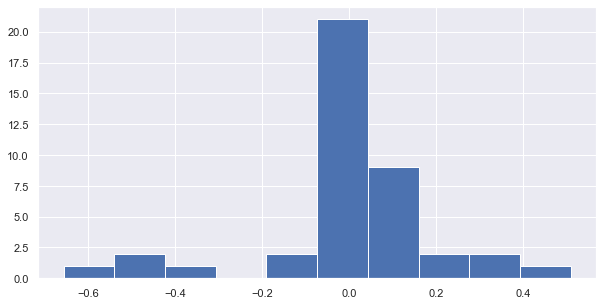

In [667]:
# Revisamos Metricas

desviacion_estandar = df_correlation['Item_Outlet_Sales'].std()

print('Desviacion Estandar es '+str(df_correlation['Item_Outlet_Sales'].std()))
print('Desviacion Estandar es '+str(df_correlation['Item_Outlet_Sales'].mean()))
print('Desviacion Estandar es '+str(df_correlation['Item_Outlet_Sales'].median()))

df_correlation['Item_Outlet_Sales'].hist(figsize=(10, 5))

In [668]:
# Dejamos solo las columnas que tienen un valor mayor o menor a 1 desviacion estandar:
df_correlation['valor_absoluto'] = abs(df_correlation['Item_Outlet_Sales'])

df_correlation = df_correlation[(df_correlation['valor_absoluto'] >= desviacion_estandar)]
lista_columnas_correlacion = df_correlation['index'].to_list()
lista_columnas_correlacion.append('Item_Outlet_Sales')
lista_columnas_correlacion


['Item_MRP',
 'Grocery Store',
 'Supermarket Type1',
 'Supermarket Type3',
 'Medium',
 'Small',
 'OUT010',
 'OUT019',
 'OUT027',
 'Item_Outlet_Sales']

In [669]:
# Filramos el df_regression solo con las columnas que estan altamente correlacionadas
df_regression = df_regression[lista_columnas_correlacion]
df_regression

,Item_MRP,Grocery Store,Supermarket Type1,Supermarket Type3,Medium,Small,OUT010,OUT019,OUT027,Item_Outlet_Sales
0,249.8092,0,1,0,1,0,0,0,0,8.225540
1,48.2692,0,0,0,1,0,0,0,0,6.094524
2,141.6180,0,1,0,1,0,0,0,0,7.648392
3,182.0950,1,0,0,0,1,1,0,0,6.596300
4,53.8614,0,1,0,0,0,0,0,0,6.902446
...,...,...,...,...,...,...,...,...,...,...
8514,214.5218,0,1,0,0,0,0,0,0,7.929625
8515,108.1570,0,1,0,1,0,0,0,0,6.308617
8516,85.1224,0,1,0,0,1,0,0,0,7.084322
8517,103.1332,0,0,0,1,0,0,0,0,7.520558


#### Creamos sets de entrenamiento y test

In [670]:
x = df_regression.drop(columns='Item_Outlet_Sales')
y = df_regression['Item_Outlet_Sales']
print(len(x))
print(len(y))

8519
8519


In [671]:
# Importamos train_test_split para separar nuestro datframe entre train y test
from sklearn.model_selection import train_test_split


# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)
# x_train= x_train.reshape(-1, 1)
# x_test = x_test.reshape(-1, 1)

train , test = train_test_split(df_regression, test_size = 0.3, random_state=42)

# Entrenamiento
x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

# Testeo
x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

########################################################################################################################

# Pre procesamiento el scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Aplicamos Scaler a trin y test
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [672]:
print(len(x))
print(len(y))

8519
8519


### Modelo KNN

#### 1. Validamos K

RMSE value for k=  1 is: 0.7281153379875862
RMSE value for k=  2 is: 0.6297438135085774
RMSE value for k=  3 is: 0.594895764326049
RMSE value for k=  4 is: 0.5758978261641875
RMSE value for k=  5 is: 0.5623877469826918
RMSE value for k=  6 is: 0.5553293008723185
RMSE value for k=  7 is: 0.549931885457598
RMSE value for k=  8 is: 0.5472498362369412
RMSE value for k=  9 is: 0.5447885575169847
RMSE value for k=  10 is: 0.5403578999593482
RMSE value for k=  11 is: 0.535668410118322
RMSE value for k=  12 is: 0.5330851518332542
RMSE value for k=  13 is: 0.5306048975003101
RMSE value for k=  14 is: 0.5293356061939428
RMSE value for k=  15 is: 0.5276809580832048
RMSE value for k=  16 is: 0.5265302675296931
RMSE value for k=  17 is: 0.5257021045696969
RMSE value for k=  18 is: 0.5244842483894613
RMSE value for k=  19 is: 0.5233689606703894
RMSE value for k=  20 is: 0.522377701265452
RMSE value for k=  21 is: 0.5220963782838438
RMSE value for k=  22 is: 0.5219473511093964
RMSE value for k=  23 i

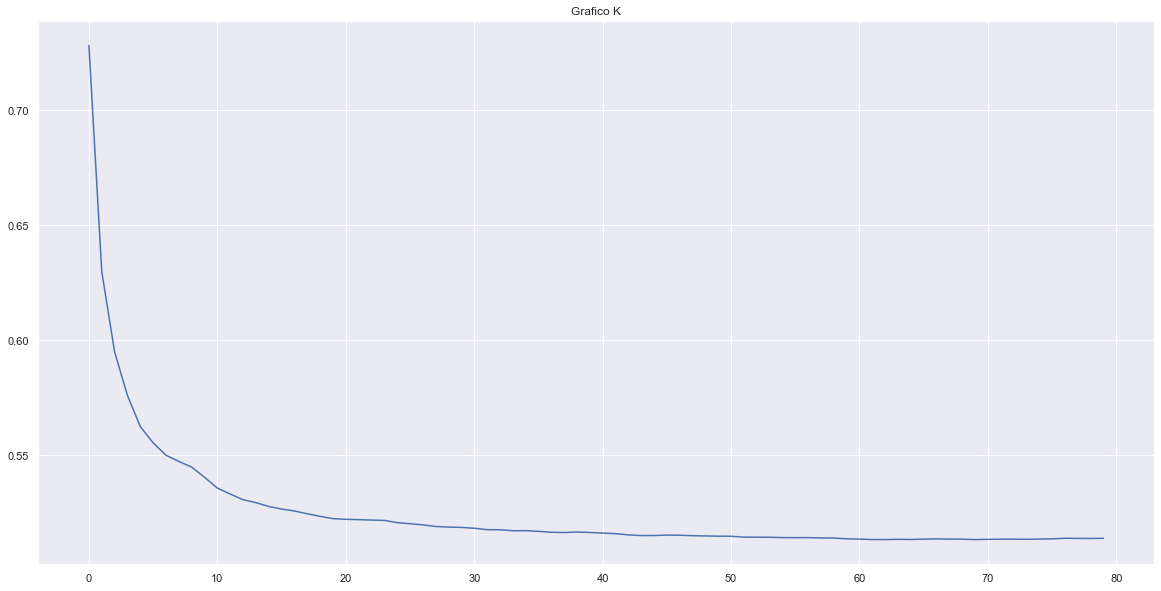

In [691]:
# Hacemos un for para optimizar le numero de K, con el error cuadratico medio

rmse_val = [] #to store rmse values for different k
for K in range(80):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

print(min(rmse_val))

# plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
plt.figure(figsize=(20, 10))
plt.plot(curve)
plt.title('Grafico K')
plt.show()

#### Aplicamos KNN

In [692]:
# Aplicamos el modelo

# Entrenamos el modelo con K = 7
model = neighbors.KNeighborsRegressor(n_neighbors = 70)
model.fit(x_train, y_train)  #fit the model

# Predecimos
pred = model.predict(x_test) #make prediction on test set

# Variable original
y_lista = np.array(y_test)

y_lista

array([7.18408617, 6.32663594, 5.55938079, ..., 7.98009074, 6.54691826,
       6.57795037])

#### Calculamos Metricas

 
---------------------------------------------
|    Calculamos las metricas del modelo     |
---------------------------------------------

El R2 del modelo es 0.7398412807675929
Mean Squared Error: 0.26344152288132505
Root Mean Squared Error: 0.5132655481145457


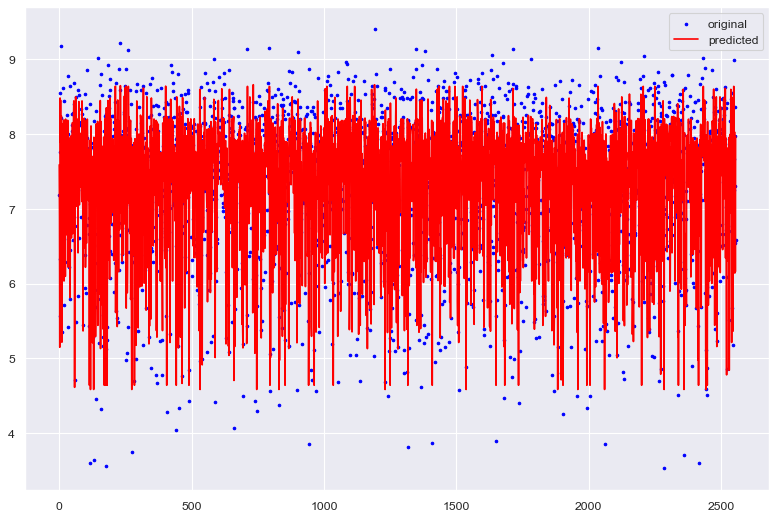

<Figure size 720x360 with 0 Axes>

In [693]:
# Calculamos metricas del modelo y graficamos las predicciones vs los valores de test.

print(''' 
---------------------------------------------
|    Calculamos las metricas del modelo     |
---------------------------------------------
''')

score = model.score(x_test,y_test)
print('El R2 del modelo es ' + str(score))

mse =mean_squared_error(y_lista, pred)
print("Mean Squared Error:",mse)
 
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)


from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)

x_ax=range(len(y_test))
plt.scatter(x_ax, y_lista, s=5, color="blue", label="original")
plt.plot(x_ax, pred,lw=1.5, color="red", label="predicted")
plt.legend()
plt.figure(figsize=(10, 5))
plt.show()

### Modelo Regresion Lineal

#### Aplicamos Modelo

In [676]:
# Traemos el modelo
mlr = LinearRegression(fit_intercept=True)

# Entrenamos modelo con train
mlr.fit(x_train,y_train)

LinearRegression()

In [677]:
print(mlr.intercept_, mlr.coef_, mlr.score(x_train, y_train))

6.340844157196862 [ 1.9666996  -1.1826774   0.20241193  0.36740053  0.04569498  0.07163516
 -0.60101197 -0.58166543  0.36740053] 0.7160674134156071


In [678]:
#Prediction of test set
y_pred_mlr = mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [7.45904389 6.79764397 5.09969824 ... 7.40590301 6.33307814 7.78791638]


In [679]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
7498,7.184086,7.459044
7842,6.326636,6.797644
2571,5.559381,5.099698
1084,8.551259,8.312331
856,7.765116,8.001959


#### Calculamos Metricas

 
---------------------------------------------
|    Calculamos las metricas del regressor     |
---------------------------------------------

El R2 del regressor es 0.7282305748317413
Mean Squared Error: 0.2751987381016826
Root Mean Squared Error: 0.5245938792072231


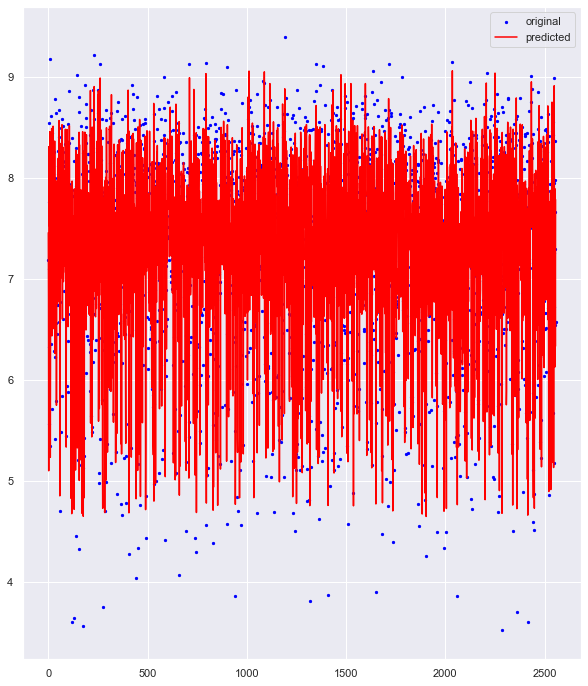

<Figure size 720x360 with 0 Axes>

In [680]:
print(''' 
---------------------------------------------
|    Calculamos las metricas del regressor     |
---------------------------------------------
''')

score = mlr.score(x_test,y_test)
print('El R2 del regressor es ' + str(score))

mse =mean_squared_error(y_lista, y_pred_mlr)
print("Mean Squared Error:",mse)
 
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

x_ax = range(len(y_test))
plt.scatter(x_ax, y_lista, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred_mlr,lw=1.5, color="red", label="predicted")
plt.legend()
plt.figure(figsize=(10, 5))
plt.show()

In [681]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 6.118775688471214
Coefficients: 
 [ 0.00830058 -1.19160512  0.18244705  0.35453039  0.03635885  0.05093377
 -0.61132589 -0.58027924  0.35453039]
                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     3123.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:33:42   Log-Likelihood:                -6811.4
No. Observations:                8519   AIC:                         1.364e+04
Df Residuals:                    8511   BIC:                         1.370e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t  

### Random Forest

In [682]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x_train, y_train)  

RandomForestRegressor(random_state=0)

In [683]:
# Use the forest's predict method on the test data
predictions = regressor.predict(x_test)
# Calculate the absolute errors

errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.47 degrees.


 
---------------------------------------------
|    Calculamos las metricas del regressor     |
---------------------------------------------

El R2 del regressor es 0.6325468818923845
Mean Squared Error: 0.3720898123552234
Root Mean Squared Error: 0.609991649414337


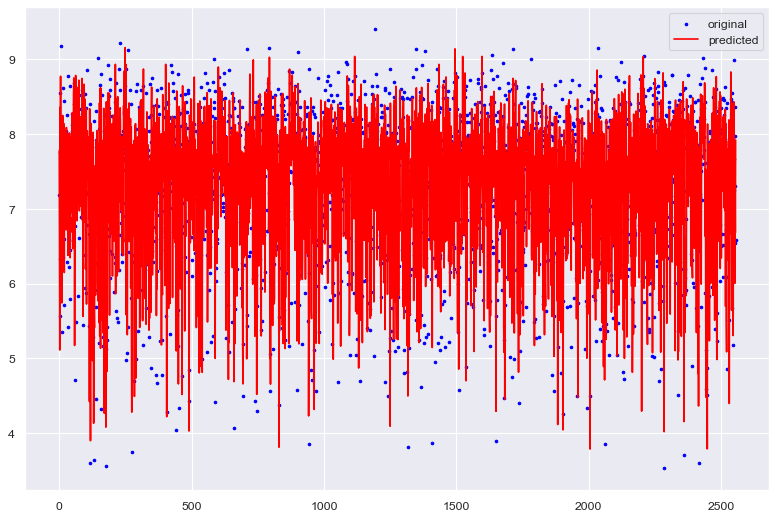

<Figure size 720x360 with 0 Axes>

In [684]:
print(''' 
---------------------------------------------
|    Calculamos las metricas del regressor     |
---------------------------------------------
''')

score = regressor.score(x_test,y_test)
print('El R2 del regressor es ' + str(score))

mse = mean_squared_error(y_lista, predictions)
print("Mean Squared Error:",mse)
 
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)

x_ax=range(len(y_test))
plt.scatter(x_ax, y_lista, s=5, color="blue", label="original")
plt.plot(x_ax, predictions,lw=1.5, color="red", label="predicted")
plt.legend()
plt.figure(figsize=(10, 5))
plt.show()

#### Grid Search

In [685]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)


# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: const                Importance: 0.52
Variable: Item_MRP             Importance: 0.42
Variable: Grocery Store        Importance: 0.01
Variable: Supermarket Type1    Importance: 0.01
Variable: Supermarket Type3    Importance: 0.01
Variable: Medium               Importance: 0.01
Variable: OUT019               Importance: 0.01
Variable: Small                Importance: 0.0
Variable: OUT010               Importance: 0.0


[None, None, None, None, None, None, None, None, None]

In [694]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [695]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
regressor_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
regressor_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
regressor_random.best_params_

In [ ]:
def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)


best_random = regressor_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
